<a href="https://colab.research.google.com/github/lavanyamudaliyar/The-Sparks-Foundation-Tasks/blob/main/TSF(Supervised%20Ml_Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **THE SPARKS FOUNDATION INTERNSHIP**

**Data Science and Business Analytics - Task 1**

**Prediction using Supervised ML**


*   Predict the percentage of students based on number of hours studied.
*   Data can be found at the given link - 
*   To predict the score of a student if studied for 9.25 hours per day.






**Name - Lavanya Jaykumar Mudaliyar**

**Importing required Libaries**

In [47]:
import numpy as np                                   #for mathematical operations 
import pandas as pd                                  #for manipulation and storage
import matplotlib.pyplot as plt                      #for plotting
import seaborn as sns                                #for plotting with better visualization
from sklearn.model_selection import train_test_split #for splitting data in training and testing sets
from sklearn.linear_model import LinearRegression    #for creating ML models
from sklearn import metrics                          #for determining performance of ML model

**Reading the data**

In [51]:
url_data = 'http://bit.ly/w-data'
df= pd.read_csv(url_data) #directly importing data from the url into Pandas DataFrame

In [9]:
df #printing data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.head() #shows the top most of datas from the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Checking Null/Missing Values**

In [7]:
print('number of null values in Hours column:', df['Hours'].isnull().sum())
print('number of null values in Scores column:', df['Scores'].isnull().sum())

number of null values in Hours column: 0
number of null values in Scores column: 0


Here we could see no null values in our dataset

**Model Development**

Now, we will use Regression plot to get the visual representation of correlation between Scores and Hours/Day studied.

[Text(0.5, 1.0, 'Hours vs Percentage')]

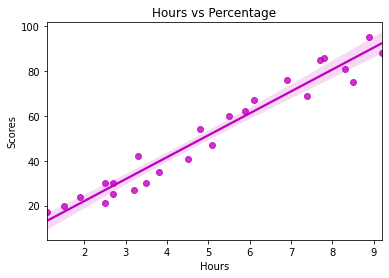

In [13]:
sns.regplot(x = 'Hours', y = 'Scores', data= df, color='m').set(title= 'Hours vs Percentage')

Using Regression plot, we see that scores of the students are positively correlated with the number of hours studied, which is linear is nature.
Hence, we will use Linear Regression Model

Further, we have to split the data into training and testing sets using train_test_split from sklearn.model_selection

In [15]:
X= df.iloc[:, :-1].values #determining values in X
y= df.iloc[:, 1].values   #determining values in y

In [17]:
X, y #checking values in X and y 

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size= 0.2, random_state=0)

Using ***Linear Regression Model*** from sklearn.linear_model

In [18]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)

2.018160041434662
[9.91065648]


In [21]:
print('Mean Squared Error is :', mean_squared_error(y_pred, y_test))
print('R^2 value is:', lr.score(X_test, y_test))

Mean Squared Error is : 21.598769307217456
R^2 value is: 0.9454906892105354


The ***R^2*** value tells us that over ***94.5%*** of students score can be determined by the number of hours studied by the student. 

**Predicting with Actual score and score of a student who studies 9.25 hours/day**

In [50]:
df = pd.DataFrame({'Actual' :y_test, 'Predicted': y_pred}) #comparing Actual vs Predicted
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
hours= 9.25
print('prediction of score for number of hours studied', hours, 'is', lr.predict(np.array([hours]).reshape(-1,1))[0])

prediction of score for number of hours studied 9.25 is 93.69173248737539


**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [48]:
print('Mean Absolute Error is :', metrics.mean_absolute_error(y_pred, y_test))

Mean Absolute Error is : 4.183859899002982


# **CONCLUSION**


1.   The Linear Regression Model explains ***94.5%*** of the data
2.   If a student studies fo ***9.25 hours/day***, then according to our model the score of the student would be approximately ***93.7***

